In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-per-country-20202025/2020-2025.csv


# **World GDP per country data analysis**

## 1. Introduction
***In this notebook, we will analyze the global gdp per country 2020-2025 dataset, countries economic growths and declines during these period.***

Note: The GDP of each country in the table is in (**million dollars**)

## 2. Importing Python Libraries

In [14]:
# single cell - DuckDB (for running SQL commands)
!pip install --quiet duckdb
import duckdb

import os
import sys
import matplotlib
#matplotlib.use("Agg")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of versions of the various libraries
print("Matplotlib version: ",matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)

# list all folders in the input directory
print(os.listdir("/kaggle/input"))
print(os.listdir("/kaggle/input/gdp-per-country-20202025"))

Matplotlib version:  3.7.2
Seaborn version: 0.12.2
Numpy version: 1.26.4
Pandas version: 2.2.3
['gdp-per-country-20202025']
['2020-2025.csv']


## 3. Loading the dataset and data overview

In [15]:
# Loading the data
file_path = "/kaggle/input/gdp-per-country-20202025/2020-2025.csv"
df = pd.read_csv(file_path)

# Print the first five rows of the table
print(df.head())
print()

# Get the shape of the table
print("The shape of the table is: ", df.shape)

# Get the columns header of the table
print("The columns header in the table are: ", df.columns)


       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0

The shape of the table is:  (196, 7)
The columns header in the table are:  Index(['Country', '2020', '2021', '2022', '2023', '2024', '2025'], dtype='object')


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**My Analysis**
* The table has 196 rows that are indexed 0-195
* The table has 7 columns which are: Country, 2020, 2021, 2022, 2023, 2024, 2025
  

## 4. Cleaning and Understanding the Data

## 4.1 Data types

In [16]:
# prints some information about the columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None


## 4.2 Summary Statistics

In [17]:
# prints some satistical information about the dataset
print(df.describe())

               2020          2021          2022          2023          2024  \
count  1.960000e+02  1.940000e+02  1.940000e+02  1.940000e+02  1.920000e+02   
mean   4.378886e+05  5.043504e+05  5.255064e+05  5.486173e+05  5.756871e+05   
std    1.942936e+06  2.220864e+06  2.347886e+06  2.453040e+06  2.573189e+06   
min    5.200000e+01  6.200000e+01  6.100000e+01  6.300000e+01  6.500000e+01   
25%    9.588000e+03  1.114175e+04  1.265000e+04  1.360450e+04  1.350050e+04   
50%    3.533450e+04  3.771900e+04  4.156800e+04  4.363100e+04  4.713550e+04   
75%    2.074810e+05  2.546132e+05  2.746308e+05  2.850355e+05  2.915108e+05   
max    2.135412e+07  2.368118e+07  2.600690e+07  2.772072e+07  2.918490e+07   

               2025  
count  1.890000e+02  
mean   5.991414e+05  
std    2.693421e+06  
min    6.500000e+01  
25%    1.421400e+04  
50%    4.782900e+04  
75%    3.032930e+05  
max    3.050722e+07  


## 4.3 Checking for null values or duplicated rows

In [18]:
# Cleaning the data

print(df.isnull().sum())
print(df.duplicated().sum())

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64
0


 **My Analysis**
* The country column has 0 null values
* The 2020 column has 0 null values
* The 2021 column has 2 null values
* The 2022 column has 2 null values
* The 2023 column has 2 null values
* The 2024 column has 4 null values
* The 2025 column has 7 null values
* The table doesn't have any duplicated rows

## 4.4 Filling null values with the value that comes before it along the row

In [19]:
pd.options.display.max_rows = 1000
pd.set_option('future.no_silent_downcasting', True)
#df = df.fillna(method="ffill", axis=1)
df = df.ffill(axis=1)

In [20]:
print(df.isnull().sum())

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64


There are no more null values in the data

## 4.5 Correlation between GDP in year 2020 through 2025

In [21]:
print(df[["2020", "2021", "2022", "2023", "2024", "2025"]].corr())

          2020      2021      2022      2023      2024      2025
2020  1.000000  0.998938  0.997834  0.997052  0.995775  0.995275
2021  0.998938  1.000000  0.998276  0.996442  0.995003  0.994166
2022  0.997834  0.998276  1.000000  0.999333  0.998699  0.998178
2023  0.997052  0.996442  0.999333  1.000000  0.999830  0.999574
2024  0.995775  0.995003  0.998699  0.999830  1.000000  0.999894
2025  0.995275  0.994166  0.998178  0.999574  0.999894  1.000000


**My Analysis**

There is a very strong positive correlation in GDP from 2020 through 2025

## 5. Exploring the Data

## 5.1 Total Global GDP from 2020 to 2025

In [22]:
glob2020 = df["2020"].sum()
glob2021 = df["2021"].sum()
glob2022 = df["2022"].sum()
glob2023 = df["2023"].sum()
glob2024 = df["2024"].sum()
glob2025 = df["2025"].sum()
print("Global GDP 2020: " + str(glob2020) + " million dollars")
print("Global GDP 2021: " + str(glob2021) + " million dollars")
print("Global GDP 2022: " + str(glob2022) + " million dollars")
print("Global GDP 2023: " + str(glob2023) + " million dollars")
print("Global GDP 2024: " + str(glob2024) + " million dollars")
print("Global GDP 2025: " + str(glob2025) + " million dollars")

Global GDP 2020: 85826173 million dollars
Global GDP 2021: 97906010.0 million dollars
Global GDP 2022: 102010263.0 million dollars
Global GDP 2023: 106493778.0 million dollars
Global GDP 2024: 110629039.0 million dollars
Global GDP 2025: 113835177.0 million dollars


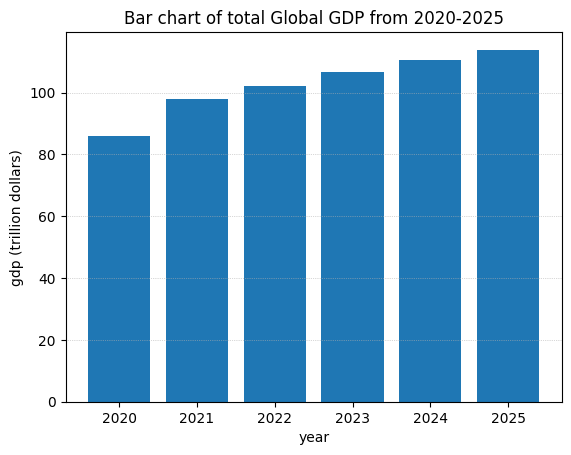

<Figure size 640x480 with 0 Axes>

In [23]:
# Visualization using matplotlib
year = np.array([2020, 2021, 2022, 2023, 2024, 2025])
gdp = np.array([85.826173, 97.906010, 102.010263, 106.493778, 110.629039, 113.835177])
plt.bar(year, gdp)
plt.title("Bar chart of total Global GDP from 2020-2025")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.grid(axis="y", linestyle="dotted", linewidth=0.5)

plt.show()
plt.savefig("globalgdp20202025.jpg")

**My Analysis**
* Global GDP year 2020: **85.826173 trillion dollars**
* Global GDP year 2021: **97.919423 trillion dollars**
* Global GDP year 2022: **102.031374 trillion dollars**
* Global GDP year 2023: **106.519015 trillion dollars**
* Global GDP year 2024: **110.720460 trillion dollars**
* Global GDP year 2025: **113.572537 trillion dollars**

There have been a consistent global GDP growth from 2020-2025

## 5.2 Countries with the highest GDP in 2020, 2022 and 2024

In [24]:
# Country with Highest GDP in 2020
x = df["2020"].max()
print(x)
for i in df.index:
    if df.loc[i, "2020"] == x:
        print(df.loc[i, 'Country'])

# Country with highest GDP in 2022
y = df["2022"].max()
print(df[df["2022"] == y][["Country", "2022"]])

# Country with the highest GDP in 2024
z = df["2024"].max()
print(z)
for i in df.index:
    if df.loc[i, "2024"] == z:
        print(df.loc[i, "Country"])

21354125
United States
           Country        2022
186  United States  26006900.0
29184900.0
United States


**My Analysis**
* The country with the highest GDP in **2020** is the **United States** with a GDP of **21.354125 trillion dollars**
* The country with the highest GDP in **2022** is the **United States** with a GDP of **26.006900 trillion dollars**
* The country with the highest GDP in **2024** is the **United States** with a GDP of **29.184900 trillion dollars**

**The United States has remained the country with the highest GDP in these years**

## 5.3 Countries with the the second highest GDP in 2020, 2022 and 2024

In [25]:
df1 = df[["Country", "2020"]].sort_values(by="2020", ascending=False)
print(df1.head(2))
print()
df2 = df[["Country", "2022"]].sort_values(by="2022", ascending=False)
print(df2.head(2))
print()
df3 = df[["Country", "2024"]].sort_values(by="2024", ascending=False)
print(df3.head(2))
                                         

           Country      2020
186  United States  21354125
36           China  15103357

           Country        2022
186  United States  26006900.0
36           China  18307816.0

           Country        2024
186  United States  29184900.0
36           China  18748009.0


**My Analysis**
* The country with the second highest GDP in **2020** is **China**, with a GDP of **15.103357 trillion dollars**
* The country with the second highest GDP in **2022** is **China**, with a GDP of **18.307816 trillion dollars**
* The country with the second highest GDP in **2024** is **China**, with a GDP of **18.748009 trillion dollars**

## 5.4 Lineplot of US and China GDP in these years (2020, 2022 and 2024)

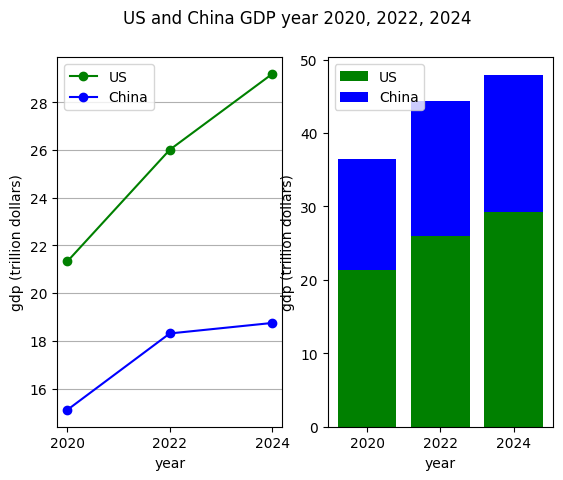

In [26]:
# Visualization with Matplotlib
x = np.array(["2020", "2022", "2024"])
y1 = np.array([21.324125, 26.006900, 29.184900])
y2 = np.array([15.103357, 18.307816, 18.748009])

plt.suptitle("US and China GDP year 2020, 2022, 2024")

plt.subplot(1, 2, 1)
plt.plot(x, y1, color="green", marker="o", label="US")
plt.plot(x, y2, color="blue", marker="o", label="China")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.grid(axis="y")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(x, y1, color="green", label="US")
plt.bar(x, y2, bottom=y1, color="blue", label="China")
plt.xlabel("year")
plt.ylabel("gdp (trillion dollars)")
plt.legend()

plt.show()

## 5.5 Countries with the Lowest GDP in 2020, 2022, 2024

In [27]:
# Country with the lowest GDP in 2020
df4 = df[["Country", "2020"]].sort_values(by="2020", ascending=True)
print(df4.head(1))

#Country with the lowest GDP in 2022
df5 = df[["Country", "2022"]].sort_values(by="2022", ascending=True)
print(df5.head(1))

# Country with the lowest GDP in 2024
df6 = df[["Country", "2024"]].sort_values(by="2024", ascending=True)
print(df6.head(1))

    Country 2020
181  Tuvalu   52
    Country  2022
181  Tuvalu  61.0
    Country  2024
181  Tuvalu  65.0


**Tuvalu** is the country with the lowest GDP in 2020, 2022 and 2024

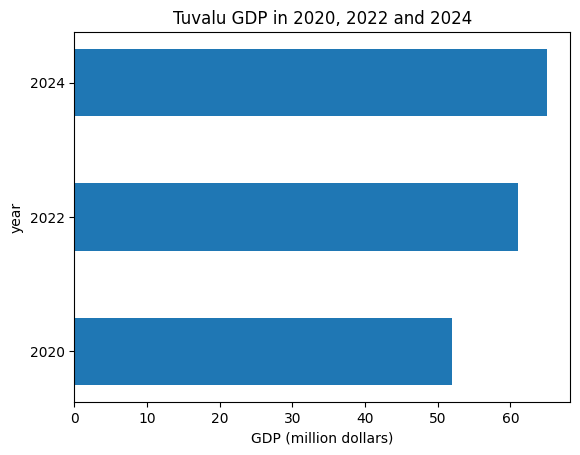

<Figure size 640x480 with 0 Axes>

In [28]:
# Visualization with Matplotlib
x = np.array(["2020", "2022", "2024"])
y = np.array([52, 61, 65])
plt.barh(x, y, height=.5)
plt.title("Tuvalu GDP in 2020, 2022 and 2024")
plt.ylabel("year")
plt.xlabel("GDP (million dollars)")

plt.show()
plt.savefig("tuvalu_gdp.jpg")

**My Analysis**
* The country with the lowest GDP in 2020 is **Tavalu**, with a GDP of **52 million dollars**
* The country with the lowest GDP in 2022 is **Tavalu**, with a GDP of **61 million dollars**
* The country with the lowest GDP in 2024 is **Tavalu**, with a GDP of **65 million dollars**

**Tavalu** has remained the lowest GDP in these years

## 5.6 Top 10 countries by GDP 2025

In [29]:
# Top ten by GDP 2025
dfs = df[["Country", "2025"]].sort_values(by="2025", ascending=False)
print(dfs.head(10))

            Country        2025
186   United States  30507217.0
36            China  19231705.0
64          Germany   4744804.0
77            India   4187017.0
85            Japan   4186431.0
185  United Kingdom   3839180.0
60           France   3211292.0
83            Italy   2422855.0
32           Canada   2225341.0
24           Brazil   2125958.0


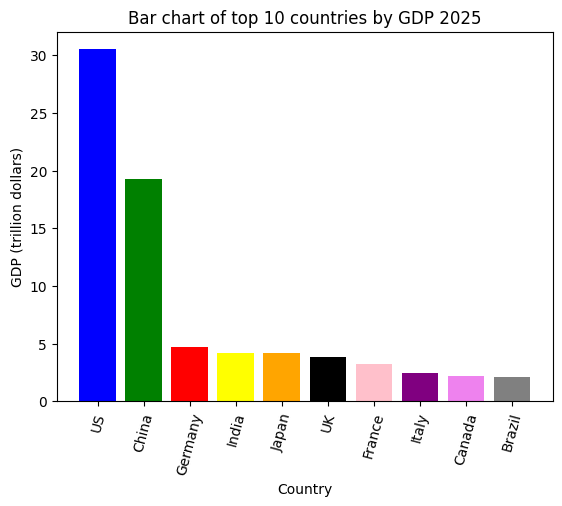

<Figure size 640x480 with 0 Axes>

In [30]:
# Visualization with matplotlib
x = np.array(["US", "China","Germany","India","Japan","UK","France","Italy","Canada","Brazil"])
y = np.array([30.507217,19.231705,4.744804,4.187017,4.186431,3.839180,3.211292,2.422855,2.225341,2.125958])
colors = np.array(["blue","green","red", "yellow", "orange", "black", "pink", "purple", "violet", "grey"])

plt.bar(x, y, color=colors)
plt.title("Bar chart of top 10 countries by GDP 2025")
plt.xlabel("Country")
plt.ylabel("GDP (trillion dollars)")
plt.xticks(rotation=75)

plt.show()
plt.savefig("top10.jpg")

            Country      2020        2021        2022        2023        2024  \
186   United States  21354125  23681175.0  26006900.0  27720725.0  29184900.0   
36            China  15103357  18190803.0  18307816.0  18270351.0  18748009.0   
64          Germany   3936989   4351188.0   4166872.0   4527009.0   4658526.0   
77            India   2674852   3167271.0   3346107.0   3638490.0   3909097.0   
85            Japan   5054069   5039148.0   4262146.0   4213167.0   4026211.0   
185  United Kingdom   2698705   3144079.0   3125404.0   3371118.0   3644636.0   
60           France   2645806   2968405.0   2797049.0   3056880.0   3162023.0   
83            Italy   1905956   2180656.0   2105722.0   2305271.0   2372059.0   
32           Canada   1655685   2022382.0   2190411.0   2173340.0   2241253.0   
24           Brazil   1476092   1670650.0   1951849.0   2191137.0   2171337.0   

           2025  
186  30507217.0  
36   19231705.0  
64    4744804.0  
77    4187017.0  
85    4186431.0  


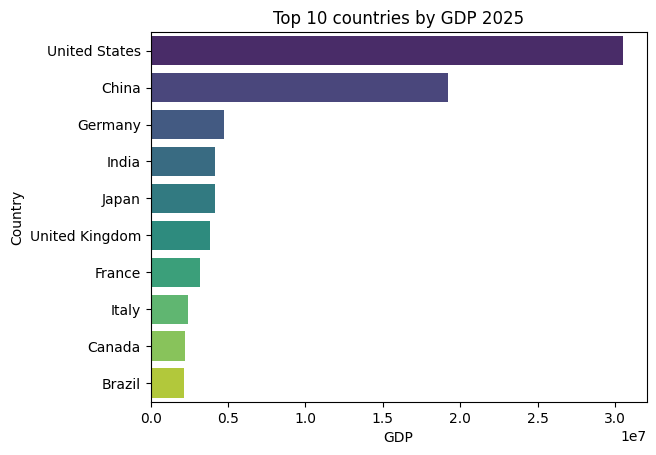

In [31]:
# Visualization with seaborn
top10 = df.sort_values(by="2025", ascending=False).head(10)
print(top10)

sns.barplot(x="2025", y="Country", data=top10, palette="viridis")
plt.title("Top 10 countries by GDP 2025")
plt.xlabel("GDP")
plt.ylabel("Country")

plt.show()

**My Analysis**

The top 10 countries by GDP 2025 are:
1. US (30.507217 trillion dollars)
2. China (19.231795 trillion dollars)
3. Germany (4.744804 trillion dollars)
4. India (4.187017 trillion dollars)
5. Japan (4.186431 trillion dollars)
6. UK (3.839180 trillion dollars)
7. France (3.211292 trillion dollars)
8. Italy (2.422855 trillion dollars)
9. Canada (2.225341 trillion dollars)
10. Brazil (2.125958 trillion dollars)

## 5.7 Top 10 countries with the fastest GDP growth between 2020-2025

In [32]:
df["percent growth"] = ((df["2025"] - df["2020"]) * 100)/ df["2020"]

dfgr = df[["Country", "percent growth"]].sort_values(by="percent growth", ascending=False)
print(dfgr.head(10))

        Country percent growth
71       Guyana     371.979528
190   Venezuela     153.305476
93   Kyrgyzstan     139.635398
72        Haiti     131.237938
63      Georgia     120.776869
28      Burundi     118.355455
69       Guinea     113.599262
102       Macau     110.519255
7       Armenia     107.704477
106    Maldives     101.834862


[371.97952842 153.30547645 139.6353978  131.23793769 120.77686879
 118.35545484 113.59926184 110.51925505 107.70447714 101.83486239]
['Guyana' 'Venezuela' 'Kyrgyzstan' 'Haiti' 'Georgia' 'Burundi' 'Guinea'
 'Macau' 'Armenia' 'Maldives']


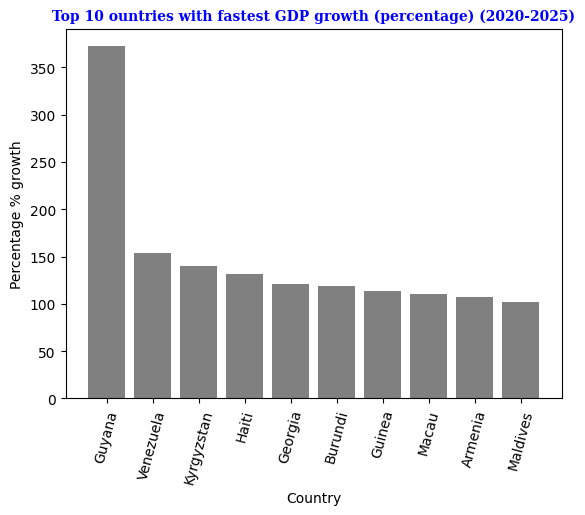

In [33]:
# Visualization with Matplotlib
w = []
for i in dfgr.head(10)["percent growth"]:
    w.append(i)
y = np.array(w)

z = []
for j in dfgr.head(10)["Country"]:
    z.append(j)
x = np.array(z)

font1 = {"family":"serif", "color":"blue", "size":10, "weight":"bold"}
print(y)
print(x)

plt.bar(x, y, color="grey")
plt.title("Top 10 ountries with fastest GDP growth (percentage) (2020-2025)", fontdict=font1)
plt.xlabel("Country")
plt.ylabel("Percentage % growth")
plt.xticks(rotation=75)

plt.show()

**My analysis**

**The top 10 countries with the fastest GDP growth between 2020-2025 are:**

* Guyana
* Venezuela
* Kyrgyzstan
* Haiti
* Georgia
* Burundi
* Guinea
* Macau
* Armenia
* Maldives

## 5.8 Countries with negative or stagnant GDP growth between 2020-2025

In [34]:
dfmin = df[df["percent growth"] <= 0][["Country", "percent growth"]]
dfmin_sort = dfmin.sort_values(by="percent growth", ascending=True)

print(dfmin_sort)

         Country percent growth
127      Nigeria     -56.448893
159  South Sudan     -26.276968
85         Japan     -17.167118
0    Afghanistan     -14.342471
193        Yemen     -13.941642
94          Laos     -11.825401
165        Sudan     -10.588302
51         Egypt      -9.197569
174  Timor-Leste       -2.21914
119      Myanmar      -1.046761
54       Eritrea            0.0
169        Syria            0.0


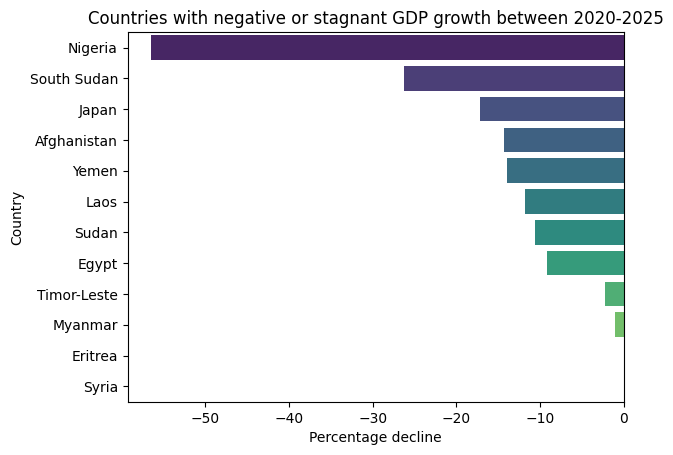

In [45]:
sns.barplot(x="percent growth", y="Country", data=dfmin_sort, palette="viridis")
plt.title("Countries with negative or stagnant GDP growth between 2020-2025")
plt.xlabel("Percentage decline")
plt.ylabel("Country")

plt.show()

**My Analysis**

**Countries with negative or stagnant GDP growth between 2020-2025 are:**

 
          Country     percent
    *     Nigeria    -56.448893
    *     South Sudan -26.276968
    *     Japan       -17.167118
    *     Afghanistan -14.342471
    *     Yemen       -13.941642
    *     Laos        -11.825401
    *     Sudan       -10.588302
    *     Egypt       -9.197569
    *     Timor-Leste   -2.21914
    *     Myanmar      -1.046761
    *     Eritrea      0.0
    *     Syria        0.0


* The country with the worst GDP growth over the period is Nigeria
* The zero percent GDP growth in Eritrea and Syria is because data is unvailable and we assumed the GDP has been constant throughout the years

## 5.9 Top 10 countries with the lowest GDP 2025

In [36]:
df2 = df.sort_values(by="2025", ascending=True).head(10)
print(df2[["Country", "2025"]])

                            Country    2025
181                          Tuvalu    65.0
121                           Nauru   169.0
109                Marshall Islands   297.0
89                         Kiribati   312.0
132                           Palau   333.0
113  Federated States of Micronesia   500.0
176                           Tonga   568.0
48                         Dominica   742.0
147           São Tomé and Príncipe   864.0
162           Saint Kitts and Nevis  1129.0


In [46]:
# Using SQL
q1 = """
SELECT Country, "2025" FROM df
ORDER BY "2025" ASC
LIMIT 10
"""
s = duckdb.query(q1).to_df()
print(s)

                          Country    2025
0                          Tuvalu    65.0
1                           Nauru   169.0
2                Marshall Islands   297.0
3                        Kiribati   312.0
4                           Palau   333.0
5  Federated States of Micronesia   500.0
6                           Tonga   568.0
7                        Dominica   742.0
8           São Tomé and Príncipe   864.0
9           Saint Kitts and Nevis  1129.0


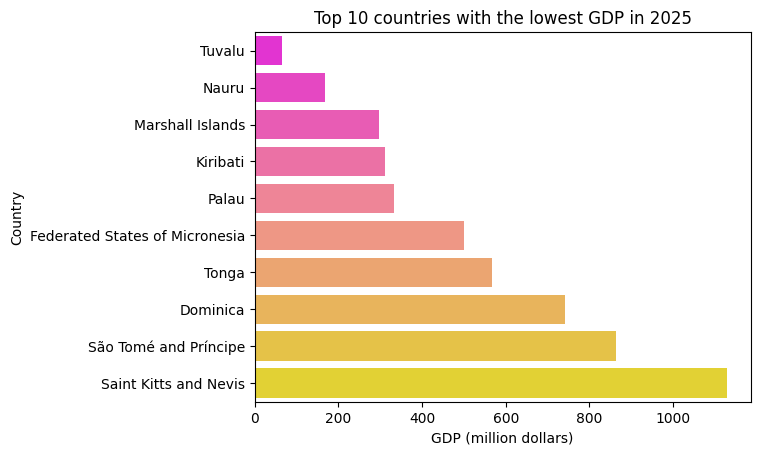

In [52]:
sns.barplot(x="2025", y="Country", data=s, palette="spring")
plt.title("Top 10 countries with the lowest GDP in 2025")
plt.xlabel("GDP (million dollars)")
plt.ylabel("Country")

plt.show()

**My Analysis**

The top 10 countries with the lowest GDP in 2025 are:
* Tuvalu (65 million dollars)
* Nauru (169 million dollars)
* Marshall Islands (297 million dollars)
* Kiribati (312 million dollars)
* Palau (333 million dollars)
* Federated States of Micronesia (500 million dollars)
* Tonga (568 million dollars)
* Dominica (742 million dollars)
* Sao Tome and Principe (864 million dollars)
* Saint Kitts and Nevis (1.129 billion dollars)

**They have the lowest GDP because they are smaller countries with small economy**

## 5.10 Top 10 Countries with the most volatile economy over these period

In [39]:
year = ["2020", "2021", "2022", "2023", "2024", "2025"]
lis = []
for i in range(df.shape[0]):
    a = df.iloc[i][year]
    lis.append(a.std())
#print(lis)
df["standard deviation"] = lis
#print(df)

In [40]:
df["mean"] = (df["2020"]+ df["2021"]+ df["2022"]+ df["2023"]+ df["2024"]+ df["2025"]) / 6
#print(df.head())
df["coefficient of variation"] = df["standard deviation"] / df["mean"]
#print(df.head())

In [41]:
a = df.sort_values(by="coefficient of variation", ascending=False)[["Country", "coefficient of variation"]].head(10)
print(a)

        Country coefficient of variation
71       Guyana                 0.523525
127     Nigeria                 0.371626
190   Venezuela                 0.352511
93   Kyrgyzstan                 0.334789
102       Macau                 0.333645
28      Burundi                 0.302576
63      Georgia                 0.300613
72        Haiti                 0.293761
7       Armenia                 0.293407
69       Guinea                 0.279105


**The counries with the most volatile economy over the period are:**
* Guyana
* Nigeria
* Venezuela
* Kyrgyzstan
* Macau
* Burundi
* Georgia
* Haiti
* Armenia
* Guinea
 

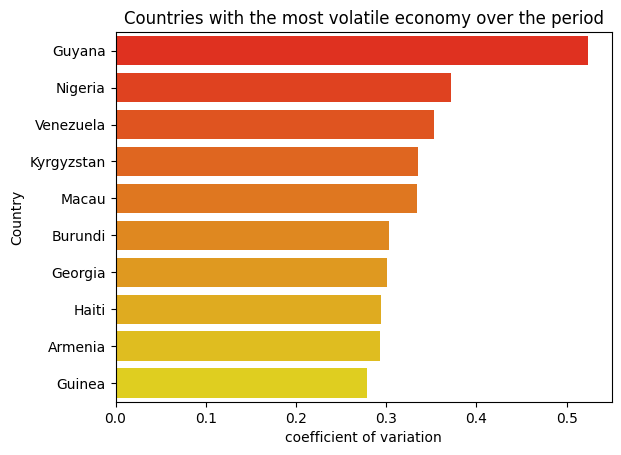

In [44]:
# Using seaborn for data visualization
sns.barplot(x="coefficient of variation", y="Country", data=a, palette="autumn")
plt.title("Countries with the most volatile economy over the period")

plt.show()

## 5.11 Top countries with the most stable economy over these period

In [42]:
b = df.sort_values(by="coefficient of variation", ascending=True)[["Country", "coefficient of variation"]].head(10)
print(b)

         Country coefficient of variation
54       Eritrea                      0.0
169        Syria                      0.0
173     Thailand                 0.036517
90   South Korea                  0.03792
119      Myanmar                 0.043502
59       Finland                 0.043982
176        Tonga                 0.045094
167       Sweden                 0.055316
97       Lesotho                 0.056182
170       Taiwan                 0.058065


**My Analysis**

The coefficient of variation of Eritrea and Syria is zero because some years contained null values(due to lack of available data) and we assumed that the GDP has been constant over the years by filling the GDP of a year with the GDP of the previous year(Forward-fill along the rows)

**So the countries with the most stable economy over these period are:**
* Thailand
* South Korea
* Myanmar
* Finland
* Tonga
* Sweden
* Lesotho
* Taiwan